### K Means Clustring Algorithm

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
%matplotlib inline

In [32]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [33]:
X

array([[  4.44852906,  -7.68927153],
       [  3.29820168,  -9.05477663],
       [  3.1965116 ,  -9.49587999],
       ...,
       [  6.82505673,   1.61228223],
       [-10.49029962,   1.9791192 ],
       [  3.53283404,  -9.49272861]], shape=(1000, 2))

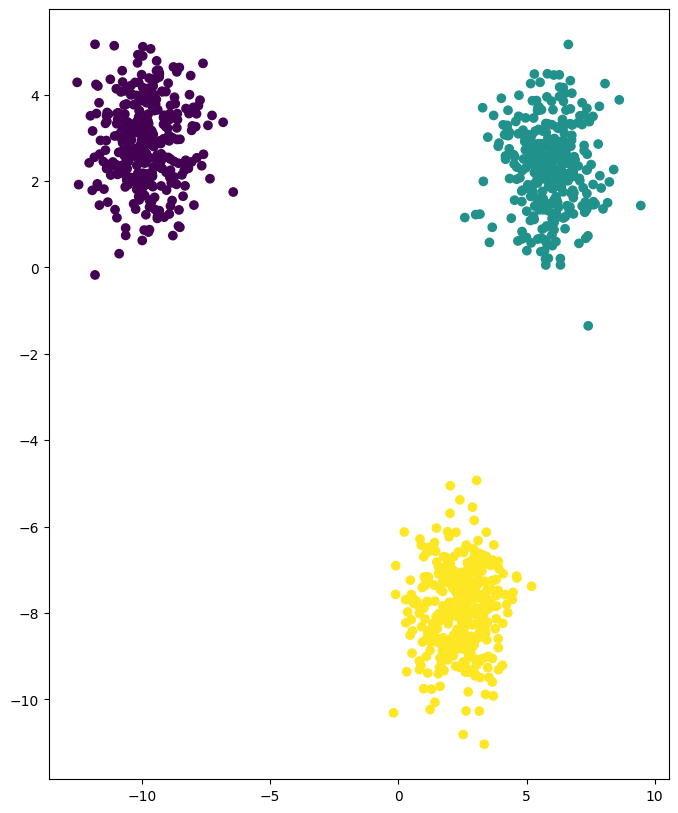

In [34]:
plt.figure(figsize=(8,10))
plt.scatter(X[:,0], X[:,1], c=y) 

In [35]:
# standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

## we do transform here because to prevent the data leakage to the model from our side
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.cluster import KMeans

In [39]:
# Elbow Method to select the K value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [40]:
wcss

[1600.0000000000002,
 754.9768124542702,
 47.24695428596094,
 41.05277146870612,
 38.30538055074922,
 31.61227950731201,
 25.298511909965015,
 23.64964658799575,
 20.99937983351825,
 19.31043252070411]

Text(0.5, 1.0, 'Elbow Method')

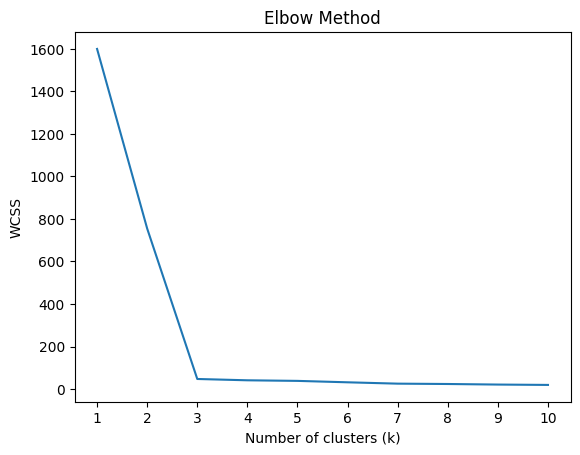

In [41]:
# plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

In [42]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [43]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0,
       1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1,
       0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0,
       0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2,
       1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1,

In [44]:
y_pred = kmeans.predict(X_test_scaled)

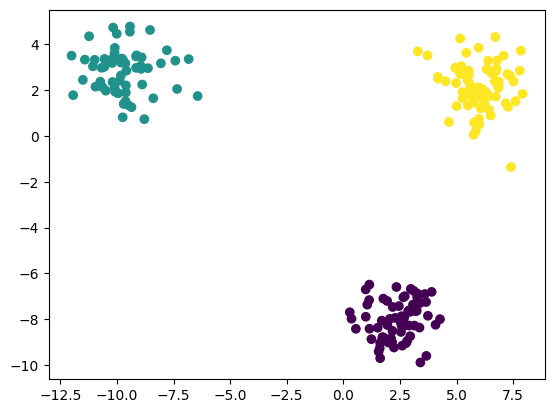

In [46]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred) 

# Validating the K valeu
KneeLocator /n
Silhoutee Scoring

In [47]:
!pip install kneed


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [48]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

np.int64(3)

In [49]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [50]:
silhouette_coeff = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coeff.append(score)

In [51]:
silhouette_coeff

[0.6470088009248866,
 0.8583918666114427,
 0.6895235306877427,
 0.5211653139382235,
 0.3635243964902517,
 0.3531846756951639,
 0.3429491427600228,
 0.340756310835646,
 0.31222463256203314]

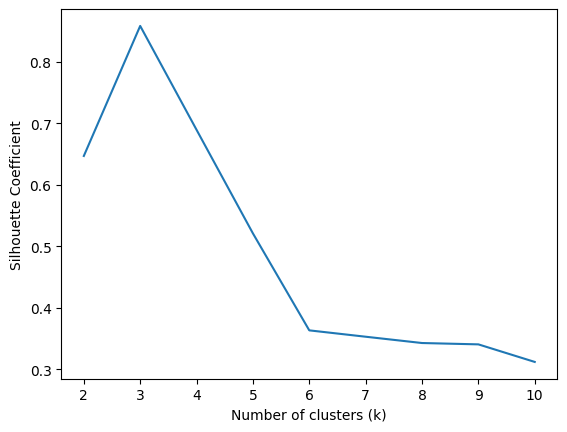

In [52]:
plt.plot(range(2, 11), silhouette_coeff)
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()